## Session11 - playground (optional)

In [1]:
# Usual imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
    
# Network building and training
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

### Load and prepare the dataset / データを読み込んで準備する

In [2]:
from mnist_loader import MNISTImageLoader
mnist_image_loader = MNISTImageLoader(43)
X, y = mnist_image_loader.samples(70000)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.5)

# Limit the values in [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (35000, 28, 28, 1)
Testing set size: (35000, 28, 28, 1)


<div style="background-color: #FFDDBB; padding: 10px;">
<b>REMINDER</b>: If you are getting strange errors when executing code with neural networks, make sure that you stopped or restarted the kernels in all other notebooks!
    
<b>注意</b>：ニューラルネットワークのコードを実行しているときに見知らぬエラーが発生した場合は、他のすべてのノートブックでカーネルを停止または再起動したかを確認してください！
</div>


## OPTIONAL 1
Create a CNN to recognize MNIST digits. You can re-use the example CNN.
<br>
You should name your network `network`.


MNISTの手書き数字を認識するCNNを作成してください。mainノートブックのサンプルCNNを再利用しても構いません。
<br>
ネットワークの変数の名前は`network`にしてください。

In [3]:
## YOUR CODE HERE
input_shape = X_train[0].shape
img_input = Input(shape = input_shape, name='input')

conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu', name='conv1')(img_input)
conv2 = Conv2D(64, (3, 3), activation='relu', name='conv2')(conv1)
pool = MaxPooling2D(pool_size=(2, 2), name='pool')(conv2)

dp1 = Dropout(0.25)(pool)
fl = Flatten()(dp1)

fc1 = Dense(128, activation='relu', name="fc1")(fl)
dp2 = Dropout(0.5)(fc1)
fc2 = Dense(10, activation='softmax', name="fc2")(dp2)
network = Model(img_input, fc2, name='CNN_classification')

2022-05-01 22:51:02.303713: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-01 22:51:02.304342: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [4]:
network.summary()

Model: "CNN_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 64)        18496     
_________________________________________________________________
pool (MaxPooling2D)          (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)        

In [5]:
network.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

## OPTIONAL 2
- Split the data into a training set and a testing set. 
- Train again your CNN, using the testing set as validation data
- Plot the evolution of the loss functions
- Test the performance on the testing set (confusion matrix and accuracy)


- MNISTデータセットをトレーニングセットとテストセットに分割する
- テストセットを検証データ（`validation_data`引数）として使用し、CNNを再度トレーニングする
- 損失関数の進化をプロットする
- テストセットでパフォーマンスを確認する（混合行列と精度）

In [6]:
## YOUR CODE HERE
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

H = network.fit(X_train, y_train_one_hot,
                batch_size=100, epochs=20,
                validation_data=(X_test, y_test_one_hot),
                verbose=1)

Train on 35000 samples, validate on 35000 samples
Epoch 1/20
35000/35000 [==============================] - 203s 6ms/sample - loss: 0.3429 - acc: 0.8976 - val_loss: 0.0837 - val_acc: 0.9764
Epoch 2/20
35000/35000 [==============================] - 196s 6ms/sample - loss: 0.1557 - acc: 0.9530 - val_loss: 0.0724 - val_acc: 0.9778
Epoch 3/20
35000/35000 [==============================] - 200s 6ms/sample - loss: 0.1350 - acc: 0.9592 - val_loss: 0.0670 - val_acc: 0.9809
Epoch 4/20
35000/35000 [==============================] - 196s 6ms/sample - loss: 0.1210 - acc: 0.9631 - val_loss: 0.0646 - val_acc: 0.9807
Epoch 5/20
35000/35000 [==============================] - 208s 6ms/sample - loss: 0.1128 - acc: 0.9653 - val_loss: 0.0590 - val_acc: 0.9835
Epoch 6/20
35000/35000 [==============================] - 232s 7ms/sample - loss: 0.1092 - acc: 0.9675 - val_loss: 0.0536 - val_acc: 0.9843
Epoch 7/20
35000/35000 [==============================] - 201s 6ms/sample - loss: 0.1073 - acc: 0.9677 - val_l

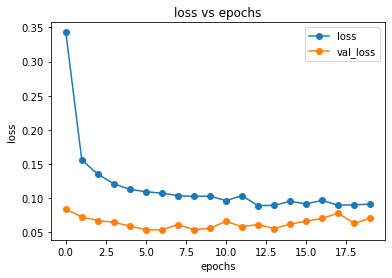

In [7]:
#loss
plt.plot(H.history['loss'], 'o-',label="loss")
plt.plot(H.history['val_loss'], 'o-', label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs epochs")
plt.legend();

## OPTIONAL 3
- Test hand written digit recognition by running the next cell
- Evaluate the performance of the network


- 次のセルを実行して手書き数字の認識をテストする
- ネットワークのパフォーマンスを評価する

In [11]:
from digit_classifier_widget import digit_classifier_widget
    
def run_classifier(X):
    y_pred_one_hot = network.predict(X)
    y_prediction = np.argmax(y_pred_one_hot)
    return y_prediction
    
digit_classifier_widget(run_classifier, image_input=True)

How does the preformance compare to the fully connected neural network?
<br>
Write your impressions in the cell below. 

全結合に比べて精度はどうでしょうか？
<br>
感想を下のセルに書いてください。

#### WRITE ANSWER HERE
ものすごく精度が高い  
ただ、トレーニングにものすごく時間がかかった